# Neural Network Regression to Locate and Size Damage in Core

*Ian Viotti, 2022*

---

In [288]:
from aux_fun import plot_damage, plot_damage2, get_core_regr_data


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing

import matplotlib
import seaborn as sns

sns.set_theme()
plt.rcParams["image.cmap"] = "Set2"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
matplotlib.rcParams.update({'font.size': 22})

# Data Aquisition

In [3]:
core_df = pd.read_csv('core_damage_data.csv')

# Data Pre-Processing

In [4]:
core_df = core_df.drop(['Unnamed: 0', '5', '6', '7', '8', '9'], axis = 1)

In [5]:
cols = ['pos x','pos y','theta_z','c','r', 'pos_z', 'theta_y', '0', '1', '2', '3','4', 'UZ - N1 M1','UZ - N1 M2','UZ - N1 M3','UZ - N1 M4', 'UZ - N2 M4','UZ - N3 M4','UZ - N4 M4','UZ - N2 M3','UZ - N3 M3','UZ - N4 M3','UZ - N2 M2','UZ - N3 M2','UZ - N4 M2','UZ - N2 M1','UZ - N3 M1','UZ - N4 M1']

In [6]:
core_df = core_df[cols]
core_df

,pos x,pos y,theta_z,c,r,pos_z,theta_y,0,1,2,...,UZ - N4 M4,UZ - N2 M3,UZ - N3 M3,UZ - N4 M3,UZ - N2 M2,UZ - N3 M2,UZ - N4 M2,UZ - N2 M1,UZ - N3 M1,UZ - N4 M1
0,0.053986,0.099418,21.772613,0.029013,0.235321,0.006292,0.757391,209.60,348.99,827.67,...,1.892296,-2.763059,-2.886250,-2.820040,1.437672,1.319039,1.628142,2.012629,1.925631,1.988941
1,0.046486,0.064694,129.592918,0.023175,0.230222,0.006206,-6.016951,209.63,348.97,827.31,...,3.372889,-3.437339,-3.445832,-3.415831,1.657951,1.643719,1.481683,1.175645,1.188745,1.141965
2,0.106295,0.141903,157.583248,0.026992,0.337651,0.006279,5.351441,209.68,349.01,826.31,...,0.002769,0.109114,0.224206,-0.534026,0.210036,0.120373,-0.390004,3.150708,3.181262,2.953393
3,0.124439,0.146964,114.484708,0.019425,0.285779,0.006120,-5.400418,209.69,349.04,827.21,...,-0.229701,0.645051,0.649874,0.019394,-1.255945,-1.151102,-1.252049,3.336511,3.338517,3.142332
4,0.046067,0.074622,6.789764,0.023551,0.319996,0.006146,7.084180,209.36,348.40,826.03,...,-3.456801,-3.324298,-3.421178,-3.321814,1.234388,1.408547,1.490102,1.188032,1.321585,1.108800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,0.069058,0.109741,8.986704,0.017667,0.304079,0.006075,-4.303691,209.66,349.04,827.41,...,1.214017,-2.417339,-2.509044,-2.549314,1.005576,0.959320,1.205454,2.187320,2.139888,2.125614
830,0.145052,0.158334,158.020320,0.025111,0.321630,0.006272,3.409136,209.65,348.86,826.45,...,-0.804690,1.327638,0.960653,0.434422,-2.084347,-2.067723,-2.532130,3.561565,3.460975,3.316413
831,0.076176,0.149468,60.156455,0.027175,0.223895,0.006097,-4.257602,209.70,349.03,827.05,...,-0.282858,1.160423,1.102713,0.206400,0.995673,1.056274,1.173763,3.497853,3.479247,3.204606
832,0.091827,0.150944,25.092292,0.019505,0.214696,0.006414,-3.704197,209.69,349.04,827.30,...,-0.163043,0.656467,0.597719,0.584521,-0.041910,0.038524,0.428599,3.338000,3.319470,3.308303


In [7]:
X_raw = core_df.values[:,7:]
y_raw = core_df.values[:,:7]

std_x = preprocessing.StandardScaler().fit(X_raw)
std_y = preprocessing.StandardScaler().fit(y_raw)

X = std_x.transform(X_raw)
y = std_y.transform(y_raw)

# Model Training

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1,
                                                    test_size = 0.3)

MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

regr = MLPR.fit(X_train, y_train)

In [8]:
regr.score(X_test, y_test)

0.47995920581299206

In [ ]:
a

In [ ]:
1.95*np.sqrt()

## Model Tuning

In [ ]:
MLPR_tuning = MLPRegressor(random_state=1,max_iter = 1000,)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(30, 15, 10)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.1,0.4, 0.5, 0.6],
}

In [ ]:
grid = GridSearchCV(MLPR_tuning, param_grid, n_jobs= -1, cv=5)
#grid.fit(X_train, y_train)

In [ ]:
grid.best_score_, grid.best_params_

In [14]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (30, 15, 10),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

tuned_fit = tuned_MLPR.fit(X_train, y_train)

In [ ]:
tuned_fit.score(X_test, y_test)

# Post Processing

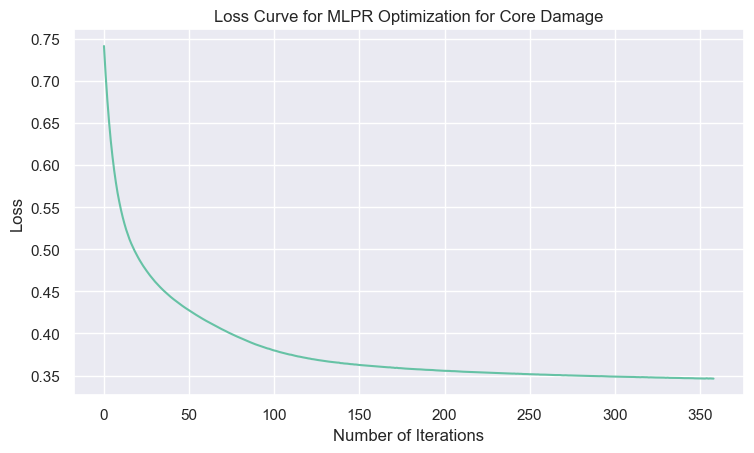

In [69]:
fig, ax = plt.subplots(figsize = (8,5), dpi=100)

ax.plot(tuned_fit.loss_curve_)
ax.set(title = 'Loss Curve for MLPR Optimization for Core Damage', xlabel = 'Number of Iterations', ylabel = 'Loss')
plt.show()

fig.savefig("images/MLPR_loss_curve_core.svg", dpi=300)

In [ ]:
RNA1_MAE = metrics.mean_absolute_error(y_test, tuned_fit.predict(X_test))
RNA2_MAE = metrics.mean_absolute_error(y_test, regr.predict(X_test))

RNA1_MAE, RNA2_MAE

In [ ]:
RNA1_MSE = metrics.mean_squared_error(y_test, tuned_fit.predict(X_test))
RNA2_MSE = metrics.mean_squared_error(y_test, regr.predict(X_test))

RNA1_MSE, RNA2_MSE

In [ ]:
RNA1_r2 = metrics.r2_score(y_test, tuned_fit.predict(X_test))
RNA2_r2 = metrics.r2_score(y_test, regr.predict(X_test))

RNA1_r2, RNA2_r2

In [ ]:
RNA1_MAPE = metrics.mean_absolute_percentage_error(y_test, tuned_fit.predict(X_test))
RNA2_MAPE = metrics.mean_absolute_percentage_error(y_test, regr.predict(X_test))

RNA1_MAPE, RNA2_MAPE

In [159]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
import statsmodels.stats.api as sms
from scipy import stats
from scipy.stats import norm, ks_2samp

x

In [289]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (30, 15, 10),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

tuned_fit = tuned_MLPR.fit(X_train, y_train)

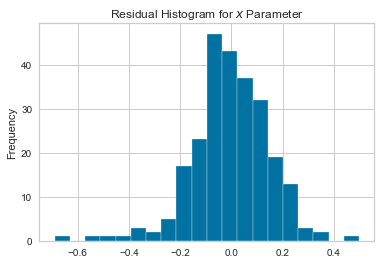

In [238]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[0], name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram for $x$ Parameter")

fig.savefig("images/MLPR_residual_x_core.svg", dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[0], plot=ax)

ax.set(title='Probability Plot for $x$ Parameter')

fig.savefig("images/MLPR_probability_x_core.svg", dpi=300)

In [245]:
y = resids.T[0]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.07505976095617531, 0.5125328399176484)

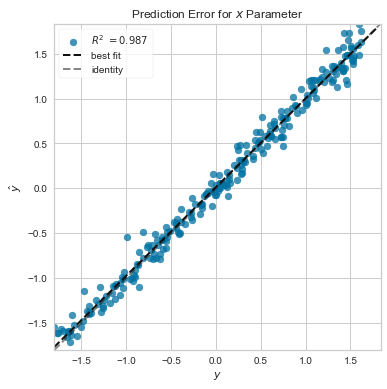

In [240]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (30, 15, 10),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR, title='Prediction Error for $x$ Parameter')
pev.fit(X_train, y_train.T[0])
pev.score(X_test, y_test.T[0])

pev.show()

fig.savefig("images/MLPR_prediction_x_core.svg", dpi=300)

y

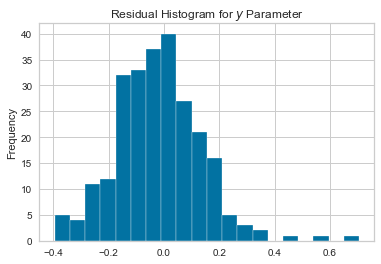

In [221]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[1], name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram for $y$ Parameter")

fig.savefig("images/MLPR_residual_y_core.svg", dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[1], plot=ax)

ax.set(title='Probability Plot for $y$ Parameter')

fig.savefig("images/MLPR_probability_y_core.svg", dpi=300)

In [308]:
y = resids.T[1]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.10756972111553786, 0.20625312757463127)

In [ ]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR , title='Prediction Error for $y$ Parameter')
pev.fit(X_train, y_train.T[1])
pev.score(X_test, y_test.T[1])
pev.show()

fig.savefig("images/MLPR_prediction_y_core.svg", dpi=300)

theta z

In [ ]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

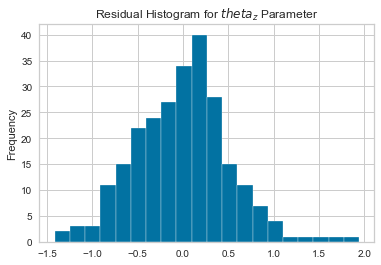

In [258]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[2], name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram for $theta_z$ Parameter")

fig.savefig("images/MLPR_residual_theta_z_core.svg", dpi=300)

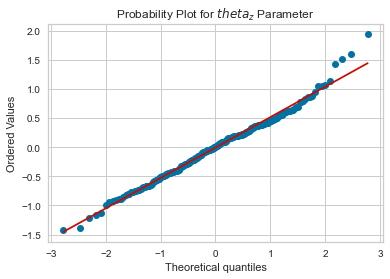

In [257]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[2], plot=ax)

ax.set(title='Probability Plot for $theta_z$ Parameter')

fig.savefig("images/MLPR_probability_theta_z_core.svg", dpi=300)

In [256]:
y = resids.T[2]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.069402390438247, 0.5901020916169137)

In [ ]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR, title = 'Prediction Error for $theta_z$ Parameter')
pev.fit(X_train, y_train.T[2])
pev.score(X_test, y_test.T[2])
pev.show()

fig.savefig("images/MLPR_prediction_theta_z_core.svg", dpi=300)

c

In [ ]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[3], name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram for $c$ Parameter")

fig.savefig("images/MLPR_residual_c_core.svg", dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[3], plot=ax)

ax.set(title = 'Probability Plot for $c$ Parameter')

fig.savefig("images/MLPR_probability_c_core.svg", dpi=300)

In [263]:
y = resids.T[3]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.09689243027888444, 0.28838830507705215)

In [ ]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR, title = 'Prediction Error for $c$ Parameter')
pev.fit(X_train, y_train.T[3])
pev.score(X_test, y_test.T[3])
pev.show()

fig.savefig("images/MLPR_prediction_c_core.svg", dpi=300)

r

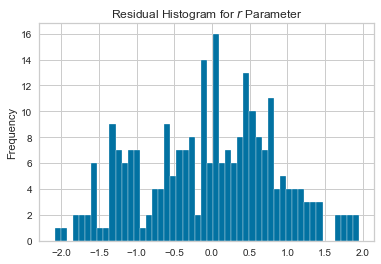

In [283]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[4], name="residuals").plot.hist(bins=50, ax=ax, title="Residual Histogram for $r$ Parameter")

fig.savefig("images/MLPR_residual_r_core.svg", dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[4], plot=ax)

ax.set(title='Probability Plot for $r$ Parameter')

fig.savefig("images/MLPR_probability_r_core.svg", dpi=300)

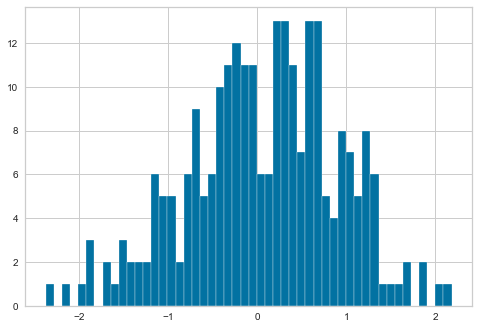

In [287]:
plt.hist(x, bins=50)
#plt.hist(y, bins=50)
plt.show()

In [285]:
y = resids.T[4]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.08358565737051793, 0.3926886508698893)

In [ ]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR, title = 'Prediction Errror for $r$ Parameter')
pev.fit(X_train, y_train.T[4])
pev.score(X_test, y_test.T[4])
pev.show()

fig.savefig("images/MLPR_prediction_r_core.svg", dpi=300)

z

In [ ]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[5], name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram for $z$ Parameter")

fig.savefig("images/MLPR_residual_z_core.svg", dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[5], plot=ax)

ax.set(title='Probability Plot for $z$ Parameter')

fig.savefig("images/MLPR_probability_z_core.svg", dpi=300)

In [276]:
y = resids.T[5]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.08884462151394422, 0.33891393138924)

In [ ]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR, title = 'Prediction Errror for $z$ Parameter')
pev.fit(X_train, y_train.T[5])
pev.score(X_test, y_test.T[5])
pev.show()

fig.savefig("images/MLPR_prediction_z_core.svg", dpi=300)

theta y

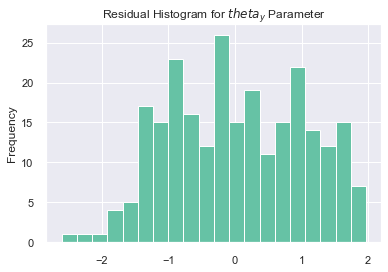

In [291]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 4))
resids = y_test - tuned_fit.predict(X_test)
pd.Series(resids.T[6], name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram for $theta_y$ Parameter")

fig.savefig("images/MLPR_residual_theta_y_core.svg", dpi=300)

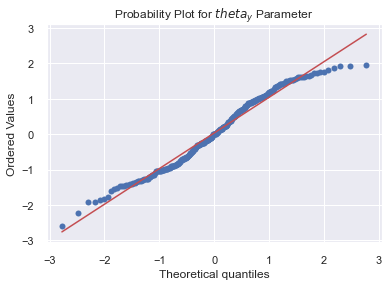

In [290]:
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids.T[6], plot=ax)

ax.set(title='Probability Plot for $theta_y$ Parameter')

fig.savefig("images/MLPR_probability_theta_y_core.svg", dpi=300)

In [293]:
y = resids.T[6]
p = []
s = []
for i in range(50):
    x = stats.norm.rvs(size=len(y), scale = np.std(y))
    p.append(ks_2samp(x,y).pvalue)
    s.append(ks_2samp(x,y).statistic)
    
np.mean(s), np.mean(p)

(0.09258964143426293, 0.27869874083240104)

In [ ]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (60, 50),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(tuned_MLPR, title = 'Prediction Errror for $theta_y$ Parameter')
pev.fit(X_train, y_train.T[6])
pev.score(X_test, y_test.T[6])
pev.show()

fig.savefig("images/MLPR_prediction_theta_y_core.svg", dpi=300)

# 3D plot

In [10]:
tuned_MLPR = MLPRegressor(random_state=1,
                     activation = 'tanh',
                     alpha = 0.6,
                     hidden_layer_sizes = (30, 15, 10),
                     learning_rate = 'constant',
                     max_iter = 1000,
                     solver = 'adam'
                    )

tuned_fit = tuned_MLPR.fit(X_train, y_train)

In [11]:
y_predictions = std_y.inverse_transform(tuned_fit.predict(X_test))
y_real = std_y.inverse_transform(y_test)

In [12]:
predictions = np.hstack((y_real, y_predictions))

In [13]:
def plot_pred(dam_to_plot):
    dam_real = predictions[dam_to_plot, :7]
    dam_pred = predictions[dam_to_plot, 7:]
    plot_damage(dam_pred, color = 'red')
    plot_damage(dam_real, color = 'blue')
    plt.title('')
    #plt.legend(['Plate','Predicted', '','Real'], loc = 'lower right')
    
    return None

dams = iter(np.arange(1, 300, 1))

In [41]:
def plot_pred2(dam_to_plot):
    dam_real = predictions[dam_to_plot, :7]
    dam_pred = predictions[dam_to_plot, 7:]
    plot_damage2(dam_pred, color = 'red')
    plot_damage2(dam_real, color = 'blue')
    #plt.legend(['Plate','Predicted', '','Real'], loc = 'lower right')
    plt.xticks([0, 0.0125], rotation = 45)
    plt.xlim(-0.01, 0.0225)
    plt.yticks([])
    plt.title('')
    return None

dams = iter(np.arange(1, 300, 1))

In [66]:
d = next(dams)

C:\Users\Ian\AppData\Local\Temp\ipykernel_15100\295466396.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig('images/corez_dam9.svg')


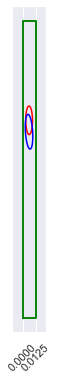

In [67]:
plot_pred2(d)

plt.savefig('images/corez_dam9.svg')

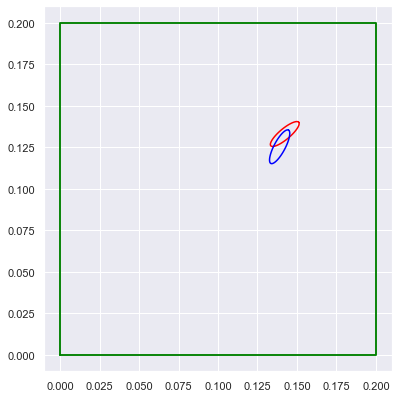

In [68]:
plot_pred(d)
plt.savefig('images/corex_dam9.svg')

In [ ]:
dams_to_plot = 7
dam_pred = predictions[:dams_to_plot, :5]
dam_real = predictions[:dams_to_plot, 5:]

In [ ]:
for i in dam_pred:
    plot_damage(i, color = 'red')
for i in dam_real:
    plot_damage(i, color = 'blue')